# Access and Analyse Contents of Textfiles

- Author:      Johannes Maucher
- Last update: 2024-10-07

In this notebook some important Python string methods are applied. This [Python string method documentation](https://www.programiz.com/python-programming/methods/string/encode) provides a compact overview. 

## Character Encoding
![encoding](https://maucher.home.hdm-stuttgart.de/Pics/encodings.png)

In contrast to Python 2.x in Python 3.y strings are stored as unicode, i.e. each string is a sequence of unicode code points. Unicode supports more than 1 million characters. Each character is represented by a *code point*.

For the efficient storage of strings they are encoded. 
* A ``str`` can be encoded into ``bytes`` using the ``encode()`` method.
* ``bytes`` can be decoded to ``str`` using the ``decode()`` method.

Both methods accept a parameter, which is the encoding used to encode or decode. The default for both is *UTF-8*.

The following code cells demonstrate the difference between strings and bytes:

In [1]:
s1="die tür ist offen"
print(s1)
print(type(s1))
b1=s1.encode('utf-8')
print("After utf-8 encoding: ",b1)
print(type(b1))
b2=s1.encode('latin-1')
print("After latin-1 encoding: ",b2)
print(type(b2))

die tür ist offen
<class 'str'>
After utf-8 encoding:  b'die t\xc3\xbcr ist offen'
<class 'bytes'>
After latin-1 encoding:  b'die t\xfcr ist offen'
<class 'bytes'>


In [2]:
print("Wrong decoding: ",b1.decode("latin-1"))
print(b2.decode("latin-1"))
print(b1.decode("utf-8"))
#print(b2.decode("utf-8"))

Wrong decoding:  die tÃ¼r ist offen
die tür ist offen
die tür ist offen


## Textfile from local machine 
### Read in row by row
The following code snippet demonstrates how to import text from a file, which is specified by its path and filename. The example text file is [ZeitOnlineLandkartenA.txt](file://../Data/ZeitOnlineLandkartenA.txt). 
In this first snippet the text in the file is read line by line. Each line is stored into a single string variable. The string variables of all lines are stored in a Python list. 

In [6]:
listOfLines = []
with open("../Data/ZeitOnlineLandkartenA.txt", "r", encoding="utf-8") as input_file:
    for line in input_file:
        line = line.strip()
        print(line)
        listOfLines.append(line)
print(f"\nNumber of lines in this text: {len(listOfLines)}")

Landkarten mit Mehrwert
Ob als Reiseführer, Nachrichtenkanal oder Bürgerinitiative: Digitale Landkarten lassen sich vielseitig nutzen.

ZEIT ONLINE stellt einige der interessantesten Dienste vor.

Die Zeit, in der Landkarten im Netz bloß der Routenplanung dienten, ist längst vorbei. Denn mit den digitalen Karten von Google Maps und der Open-Source-Alternative OpenStreetMap kann man sich spannendere Dinge als den Weg von A nach B anzeigen lassen. Über offene Programmschnittstellen (API) lassen sich Daten von anderen Websites mit dem Kartenmaterial verknüpfen oder eigene Informationen eintragen. Das Ergebnis nennt sich Mashup – ein Mischmasch aus Karten und Daten sozusagen. Die Bewertungscommunity Qype nutzt diese Möglichkeit schon lange, um Adressen und Bewertungen miteinander zu verknüpfen und mithilfe von Google Maps darzustellen. Auch Immobilienbörsen, Branchenbücher und Fotodienste kommen kaum noch ohne eigene Kartenfunktion aus. Dank der Integration von Geodaten in Smartphones werd

#### Questions
Run the cell above 
1. with `latin-1`-encoding,
2. without setting the `encoding`-parameter in the `open()`-method.

What happens? A list of codecs supported by python can be found [here](https://docs.python.org/2/library/codecs.html#standard-encodings).

### Read in text as a whole
The entire contents of the file can also be read as a whole and stored in a single string variable:

In [7]:
with open("../Data/ZeitOnlineLandkartenA.txt", "r", encoding="utf-8") as input_file:
    text = input_file.read()
print(text[:300])
print(f"\nNumber of characters in this text: {len(text)}")

Landkarten mit Mehrwert
Ob als Reiseführer, Nachrichtenkanal oder Bürgerinitiative: Digitale Landkarten lassen sich vielseitig nutzen. 

ZEIT ONLINE stellt einige der interessantesten Dienste vor.

Die Zeit, in der Landkarten im Netz bloß der Routenplanung dienten, ist längst vorbei. Denn mit den di

Number of characters in this text: 2027


## Segmentation of text-string into words
The entire text, which is now stored in the single variable _text_ can be split into it's words by applying the `split()`-method. The words are stored in a list of strings (`wordlist`). The words in the wordlist may end with punctuation marks. These marks are removed by applying the python string-method `strip()`.

In [8]:
wordlist = text.split()
print(f"First 12 words of the list: {wordlist[:12]}")

clean_wordlist = [w.strip('().,:;!?-"').lower() for w in wordlist]
print(f"First 12 cleaned words of the list: {clean_wordlist[:12]}")
print(f"Number of tokens: {len(clean_wordlist)}")
print("Number of different tokens (=size of vocabulary):  ",len(set(clean_wordlist)))

First 12 words of the list: ['Landkarten', 'mit', 'Mehrwert', 'Ob', 'als', 'Reiseführer,', 'Nachrichtenkanal', 'oder', 'Bürgerinitiative:', 'Digitale', 'Landkarten', 'lassen']
First 12 cleaned words of the list: ['landkarten', 'mit', 'mehrwert', 'ob', 'als', 'reiseführer', 'nachrichtenkanal', 'oder', 'bürgerinitiative', 'digitale', 'landkarten', 'lassen']
Number of tokens: 267
Number of different tokens (=size of vocabulary):   187


## Textfile from Web

In [9]:
#!conda install -y nltk

In [10]:
from urllib.request import urlopen
import nltk
import re

Download **Alice in Wonderland (Lewis Carol)** from [http://textfiles.com/etext](http://textfiles.com/etext):

In [11]:
alice_url = "http://textfiles.com/etext/FICTION/alice.txt"
alice_raw = urlopen(alice_url).read().decode("latin-1")

In [12]:
print("Print a short snippet of downloaded text:")
print(alice_raw[2710:3500])

Print a short snippet of downloaded text:
         THE MILLENNIUM FULCRUM EDITION 2.7a
                     (C)1991 Duncan Research



                            CHAPTER I

                      Down the Rabbit-Hole


  Alice was beginning to get very tired of sitting by her sister
on the bank, and of having nothing to do:  once or twice she had
peeped into the book her sister was reading, but it had no
pictures or conversations in it, `and what is the use of a book,'
thought Alice `without pictures or conversation?'

  So she was considering in her own mind (as well as she could,
for the hot day made her feel very sleepy and stupid), whether
the pleasure of making a daisy-chain would be worth the trouble
of getting up and picking the daisies, when suddenly a White
Rabbit with pink eyes ran close by her.

  There was no


Save textfile in local directory:

In [13]:
with open("../Data/AliceEnglish.txt","w") as output_file:
    output_file.write(alice_raw)

Read textfile from local directory:

In [14]:
with open("../Data/AliceEnglish.txt", "r", encoding="latin-1") as input_file:
    text = input_file.read()
print(text[2710:3500])
print(f"\nNumber of characters in this text: {len(text)}")

         THE MILLENNIUM FULCRUM EDITION 2.7a
                     (C)1991 Duncan Research



                            CHAPTER I

                      Down the Rabbit-Hole


  Alice was beginning to get very tired of sitting by her sister
on the bank, and of having nothing to do:  once or twice she had
peeped into the book her sister was reading, but it had no
pictures or conversations in it, `and what is the use of a book,'
thought Alice `without pictures or conversation?'

  So she was considering in her own mind (as well as she could,
for the hot day made her feel very sleepy and stupid), whether
the pleasure of making a daisy-chain would be worth the trouble
of getting up and picking the daisies, when suddenly a White
Rabbit with pink eyes ran close by her.

  There was no

Number of characters in this text: 150886


## Simple Methods to get a first impresson on text content

In a first analysis, we want to determine the most frequent words. This shall provide us a first impression on the text content. 
### Questions:
Before some simple text statistics methods (word-frequency) are implemented inspect the downloaded text. **What should be done in advance?** 

### Remove Meta-Text
The downloaded file does not only contain the story of *Alice in Wonderland*, but also some meta-information at the start and the end of the file. This meta-information can be excluded, by determining the true start and end of the story. The true start is at the phrase `CHAPTER I` and the true end is before the phrase `THE END`.

In [15]:
start_of_book = alice_raw.find("CHAPTER I")
end_of_book = alice_raw.find("THE END")
print(f"Start: {start_of_book:>7}")
print(f"End:   {end_of_book:>7}")
alice_raw = alice_raw[start_of_book:end_of_book]

Start:    2831
End:    150878


### Tokenisation
Split the relevant text into a list of words:

In [16]:
import re

In [17]:
alice_words = [word.lower() for word in re.split(r"[\s.,;´`:'()!?\"-]+", alice_raw)]
#alice_words = [word.lower() for word in re.split(r"[\W`´]+", alice_raw)]
#alice_words =["".join(x for x in word if x not in '?!().´`:\'",<>-»«') for word in alice_raw.lower().split()] 
#alice_words =["".join(x for x in word if x not in '?!.´`:\'",<>-»«') for word in alice_raw.lower().split()] 

### Generate Vocabulary and determine number of words

In [18]:
num_words_all = len(alice_words)
print(f"Number of words in the book: {num_words_all}")
alice_vocab = set(alice_words)
num_distinct_words = len(alice_vocab)
print(f"Number of different words in the book: {num_distinct_words}")
print(f"In the average each word is used {num_words_all / num_distinct_words:2.2f} times")

Number of words in the book: 27341
Number of different words in the book: 2583
In the average each word is used 10.58 times


### Determine Frequency of each word

In [19]:
from collections import Counter
word_frequencies = Counter(alice_words)
word_frequencies.most_common(20)

[('the', 1635),
 ('and', 872),
 ('to', 730),
 ('a', 630),
 ('it', 593),
 ('she', 552),
 ('i', 543),
 ('of', 513),
 ('said', 461),
 ('you', 409),
 ('alice', 397),
 ('in', 366),
 ('was', 356),
 ('that', 316),
 ('as', 263),
 ('her', 246),
 ('t', 218),
 ('at', 211),
 ('s', 200),
 ('on', 194)]

### Optimization by stop-word removal
Stopwords are words, with low information content, such as determiners (*the, a,* ...), conjunctions (*and, or,* ...), prepositions (*in, on, over,* ...) and so on. For typical information retrieval tasks stopwords are usually ignored. In the code snippet below, a stopword-list from [NLTK](http://www.nltk.org/) is applied in order to remove these non-relevant words from the document-word lists. NLTK provides stopwordlists for many different languages. Since our text is written in English, we apply the English stopwordlist:

In [20]:
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
alice_words = [word.lower() for word in alice_words if word not in stopword_list] 

In [21]:
num_words_all = len(alice_words)
print(f"Number of words in the book: {num_words_all}")
alice_vocab = set(alice_words)
num_distinct_words = len(alice_vocab)
print(f"Number of different words in the book: {num_distinct_words}")
print(f"In the average each word is used {num_words_all / num_distinct_words:2.2f} times")

Number of words in the book: 12283
Number of different words in the book: 2437
In the average each word is used 5.04 times


Generate the dictionary for the cleaned text and display it in an ordered form: 

In [22]:
word_frequencies = Counter(alice_words)
word_frequencies.most_common(20)

[('said', 461),
 ('alice', 397),
 ('little', 128),
 ('one', 103),
 ('know', 88),
 ('like', 85),
 ('would', 83),
 ('went', 82),
 ('could', 77),
 ('queen', 75),
 ('thought', 74),
 ('time', 71),
 ('see', 68),
 ('well', 63),
 ('king', 63),
 ('*', 60),
 ('began', 58),
 ('turtle', 58),
 ('way', 57),
 ('hatter', 56)]

Another option to calculate the word frequencies in an ordered manner is to apply the `nltk`-class [FreqDist](http://www.nltk.org/api/nltk.html#nltk.probability.FreqDist). 

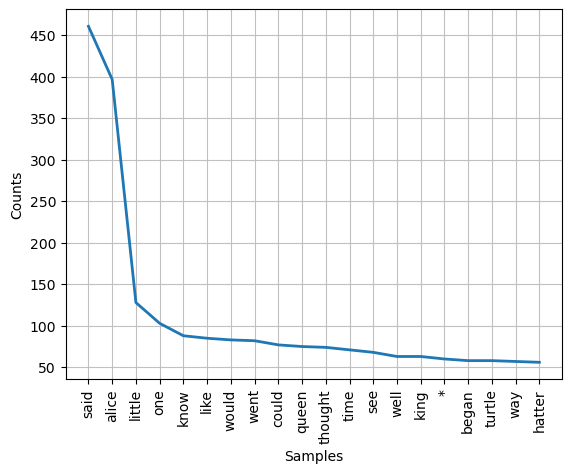

<Axes: xlabel='Samples', ylabel='Counts'>

In [23]:
fd = nltk.FreqDist(alice_words)
fd.plot(20)

### Word Cloud

Run `pip install wordcloud`, then run the following code.

In [26]:
#!pip install wordcloud

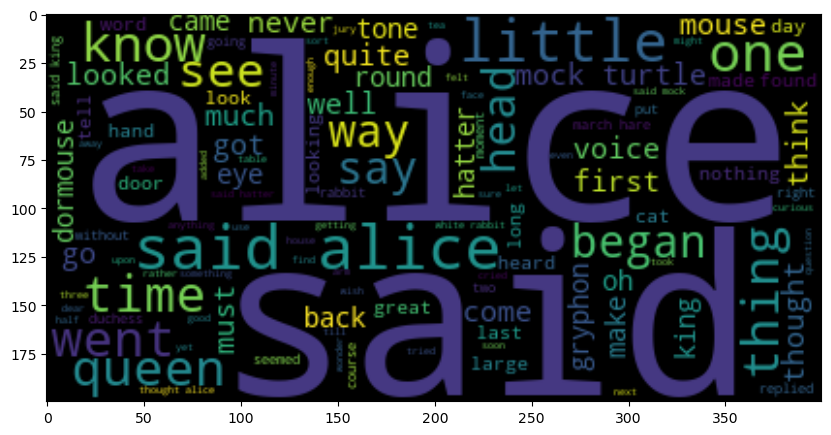

In [27]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc=WordCloud().generate(" ".join(alice_words))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")